In [1]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os

%pylab inline

if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2016")

import os
import json

Populating the interactive namespace from numpy and matplotlib


In [2]:
os.getenv('PUI2016')

'/home/cusp/nm2565/PUI2016'

In [3]:
os.getenv('PUIDATA')

'/home/cusp/nm2565/PUIdata'

In [4]:
!curl -O 'https://s3.amazonaws.com/tripdata/201512-citibike-tripdata.zip'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 22.0M  100 22.0M    0     0  24.6M      0 --:--:-- --:--:-- --:--:-- 29.3M


In [9]:
!unzip 201512-citibike-tripdata.zip

Archive:  201512-citibike-tripdata.zip
replace 201512-citibike-tripdata.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [37]:
df = pd.read_csv('201512-citibike-tripdata.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,475,12/1/2015 07:35:36,12/1/2015 07:43:32,72,W 52 St & 11 Ave,40.767272,-73.993929,173,Broadway & W 49 St,40.760647,-73.984427,22780,Subscriber,1983.0,1
1,684,12/1/2015 07:38:15,12/1/2015 07:49:39,72,W 52 St & 11 Ave,40.767272,-73.993929,520,W 52 St & 5 Ave,40.759923,-73.976485,17787,Subscriber,1975.0,1
2,1063,12/1/2015 07:44:49,12/1/2015 08:02:33,72,W 52 St & 11 Ave,40.767272,-73.993929,358,Christopher St & Greenwich St,40.732916,-74.007114,18797,Subscriber,1966.0,1
3,1075,12/1/2015 08:02:29,12/1/2015 08:20:24,72,W 52 St & 11 Ave,40.767272,-73.993929,505,6 Ave & W 33 St,40.749013,-73.988484,14625,Subscriber,1985.0,1
4,293,12/1/2015 08:06:37,12/1/2015 08:11:30,72,W 52 St & 11 Ave,40.767272,-73.993929,525,W 34 St & 11 Ave,40.755942,-74.002116,21238,Subscriber,1968.0,1


In [38]:
df['date'] = pd.to_datetime(df['starttime'], format="%m/%d/%Y %H:%M:%S")
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,475,12/1/2015 07:35:36,12/1/2015 07:43:32,72,W 52 St & 11 Ave,40.767272,-73.993929,173,Broadway & W 49 St,40.760647,-73.984427,22780,Subscriber,1983.0,1,2015-12-01 07:35:36
1,684,12/1/2015 07:38:15,12/1/2015 07:49:39,72,W 52 St & 11 Ave,40.767272,-73.993929,520,W 52 St & 5 Ave,40.759923,-73.976485,17787,Subscriber,1975.0,1,2015-12-01 07:38:15
2,1063,12/1/2015 07:44:49,12/1/2015 08:02:33,72,W 52 St & 11 Ave,40.767272,-73.993929,358,Christopher St & Greenwich St,40.732916,-74.007114,18797,Subscriber,1966.0,1,2015-12-01 07:44:49
3,1075,12/1/2015 08:02:29,12/1/2015 08:20:24,72,W 52 St & 11 Ave,40.767272,-73.993929,505,6 Ave & W 33 St,40.749013,-73.988484,14625,Subscriber,1985.0,1,2015-12-01 08:02:29
4,293,12/1/2015 08:06:37,12/1/2015 08:11:30,72,W 52 St & 11 Ave,40.767272,-73.993929,525,W 34 St & 11 Ave,40.755942,-74.002116,21238,Subscriber,1968.0,1,2015-12-01 08:06:37


In [39]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'date'],
      dtype='object')

In [40]:
df['ageM'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

In [41]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,ageM,ageF
0,475,12/1/2015 07:35:36,12/1/2015 07:43:32,72,W 52 St & 11 Ave,40.767272,-73.993929,173,Broadway & W 49 St,40.760647,-73.984427,22780,Subscriber,1983.0,1,2015-12-01 07:35:36,32.0,NaN
1,684,12/1/2015 07:38:15,12/1/2015 07:49:39,72,W 52 St & 11 Ave,40.767272,-73.993929,520,W 52 St & 5 Ave,40.759923,-73.976485,17787,Subscriber,1975.0,1,2015-12-01 07:38:15,40.0,NaN
2,1063,12/1/2015 07:44:49,12/1/2015 08:02:33,72,W 52 St & 11 Ave,40.767272,-73.993929,358,Christopher St & Greenwich St,40.732916,-74.007114,18797,Subscriber,1966.0,1,2015-12-01 07:44:49,49.0,NaN
3,1075,12/1/2015 08:02:29,12/1/2015 08:20:24,72,W 52 St & 11 Ave,40.767272,-73.993929,505,6 Ave & W 33 St,40.749013,-73.988484,14625,Subscriber,1985.0,1,2015-12-01 08:02:29,30.0,NaN
4,293,12/1/2015 08:06:37,12/1/2015 08:11:30,72,W 52 St & 11 Ave,40.767272,-73.993929,525,W 34 St & 11 Ave,40.755942,-74.002116,21238,Subscriber,1968.0,1,2015-12-01 08:06:37,47.0,NaN


In [42]:
df.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,ageM,ageF
count,8.041250e+05,804125.000000,804125.000000,804125.000000,804125.000000,804125.000000,804125.000000,804125.000000,736248.000000,804125.000000,568231.000000,166368.000000
mean,9.457116e+02,852.746103,40.737942,-73.987096,835.048672,40.737743,-73.987363,20344.104563,1976.278869,1.120432,39.007414,37.680041
std,9.684869e+03,1011.260057,0.021595,0.015378,995.653729,0.021498,0.015360,3020.327660,11.832226,0.528064,11.803001,11.675481
min,6.100000e+01,72.000000,40.678907,-74.017134,72.000000,40.646768,-74.038051,14529.000000,1885.000000,0.000000,16.000000,16.000000
25%,3.550000e+02,328.000000,40.722293,-73.997249,327.000000,40.722293,-73.998004,17698.000000,NaN,1.000000,NaN,NaN
50%,5.700000e+02,449.000000,40.739323,-73.988639,447.000000,40.739017,-73.989111,20925.000000,NaN,1.000000,NaN,NaN
75%,9.410000e+02,520.000000,40.752165,-73.977910,519.000000,40.751873,-73.978059,23140.000000,NaN,1.000000,NaN,NaN
max,2.932878e+06,3242.000000,40.787209,-73.929891,3242.000000,40.787209,-73.929891,24769.000000,1999.000000,2.000000,130.000000,89.000000


In [43]:
df['ageM'].dropna(inplace= True)
df['ageF'].dropna(inplace= True)

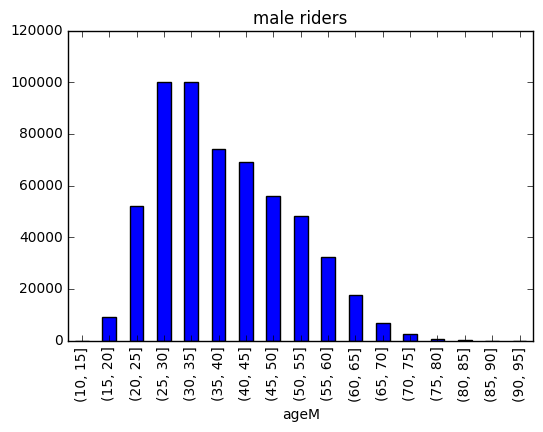

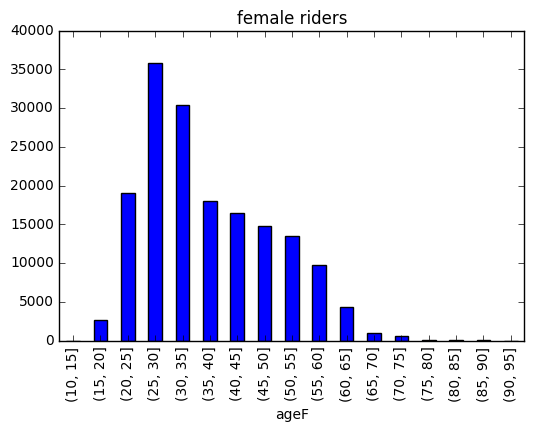

In [44]:
bins = np.arange(10, 99, 5)
axM = df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axM.set_title("male riders")
axF = df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axF.set_title("female riders")

          count_nonzero
ageM                   
(10, 15]       0.000000
(15, 20]       0.000240
(20, 25]       0.023080
(25, 30]       0.061711
(30, 35]       0.068266
(35, 40]       0.045896
(40, 45]       0.022927
(45, 50]       0.013489
(50, 55]       0.009693
(55, 60]       0.011427
(60, 65]       0.006621
(65, 70]       0.000794
(70, 75]       0.000254
(75, 80]       0.000296
(80, 85]       0.000078
(85, 90]       0.000000
(90, 95]       0.000000


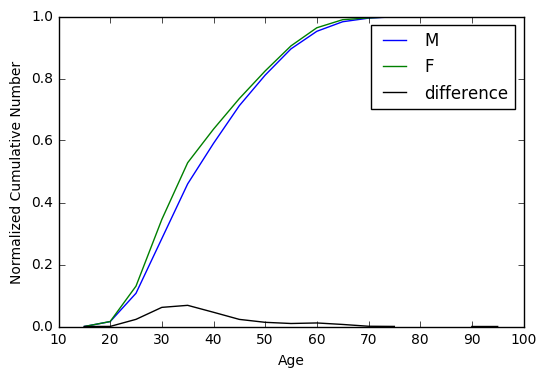

In [45]:
csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()

csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csM / csM.max()-csF / csF.max()))

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.plot(bins[:-1] + 5, np.sqrt(csF / csF.max() - csM / csM.max())**2, 'k-',
        label = "difference")
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

In [46]:
import scipy.stats

In [ ]:
#H0 = There is negative or no correlation between the ages of males and females who use citibike  
#H1 = There is a correlation between the ages of males and females who use citibike 

In [91]:
ks = scipy.stats.ks_2samp(df.ageM, df.ageF)
print (ks)

Ks_2sampResult(statistic=0.09166119891572978, pvalue=0.0)


In [34]:
condensed_df = df[::200]
condensed_df

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,ageM,ageF
0,475,12/1/2015 07:35:36,12/1/2015 07:43:32,72,W 52 St & 11 Ave,40.767272,-73.993929,173,Broadway & W 49 St,40.760647,-73.984427,22780,Subscriber,1983.0,1,2015-12-01 07:35:36,32.0,NaN
200,2010,12/4/2015 11:11:15,12/4/2015 11:44:46,72,W 52 St & 11 Ave,40.767272,-73.993929,301,E 2 St & Avenue B,40.722174,-73.983688,18920,Subscriber,1975.0,1,2015-12-04 11:11:15,40.0,NaN
400,1399,12/7/2015 18:07:48,12/7/2015 18:31:08,72,W 52 St & 11 Ave,40.767272,-73.993929,426,West St & Chambers St,40.717548,-74.013221,17148,Subscriber,1981.0,2,2015-12-07 18:07:48,NaN,34.0
600,879,12/10/2015 15:23:26,12/10/2015 15:38:05,72,W 52 St & 11 Ave,40.767272,-73.993929,490,8 Ave & W 33 St,40.751551,-73.993934,23284,Subscriber,1972.0,2,2015-12-10 15:23:26,NaN,43.0
800,1167,12/13/2015 09:18:07,12/13/2015 09:37:34,72,W 52 St & 11 Ave,40.767272,-73.993929,444,Broadway & W 24 St,40.742354,-73.989151,23084,Subscriber,1974.0,1,2015-12-13 09:18:07,41.0,NaN
1000,339,12/15/2015 17:59:02,12/15/2015 18:04:41,72,W 52 St & 11 Ave,40.767272,-73.993929,514,12 Ave & W 40 St,40.760875,-74.002777,24129,Subscriber,1973.0,2,2015-12-15 17:59:02,NaN,42.0
1200,333,12/19/2015 15:36:12,12/19/2015 15:41:46,72,W 52 St & 11 Ave,40.767272,-73.993929,500,Broadway & W 51 St,40.762288,-73.983362,18400,Subscriber,1982.0,2,2015-12-19 15:36:12,NaN,33.0
1400,1576,12/24/2015 17:35:20,12/24/2015 18:01:37,72,W 52 St & 11 Ave,40.767272,-73.993929,403,E 2 St & 2 Ave,40.725029,-73.990697,23015,Subscriber,1981.0,1,2015-12-24 17:35:20,34.0,NaN
1600,1692,12/30/2015 18:57:44,12/30/2015 19:25:56,72,W 52 St & 11 Ave,40.767272,-73.993929,449,W 52 St & 9 Ave,40.764618,-73.987895,19771,Customer,NaN,0,2015-12-30 18:57:44,NaN,NaN
1800,107,12/4/2015 08:24:49,12/4/2015 08:26:37,79,Franklin St & W Broadway,40.719116,-74.006667,257,Lispenard St & Broadway,40.719392,-74.002472,23778,Subscriber,1988.0,1,2015-12-04 08:24:49,27.0,NaN


In [49]:
condensed_df['ageM'].dropna(inplace= True)
condensed_df['ageF'].dropna(inplace= True)

In [50]:
ks = scipy.stats.ks_2samp(condensed_df.ageM, condensed_df.ageF)
print (ks)

Ks_2sampResult(statistic=0.14159070203030763, pvalue=1.0315439032972565e-11)


In [ ]:
#Since the value of d statistic is closer to 0, it means that the two samples were drawn from the same distribution.

In [71]:
sorted(df.ageM)
male_sort = sorted(df.ageM)
male_sort
#sorting the number of males.

[16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,

In [72]:
sorted(df.ageF)
female_sort = sorted(df.ageF)
female_sort
#sorting the number of females.

[16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,

In [58]:
a= len(df.ageM)
a

568231

In [59]:
b=len(df.ageF)
b

166368

In [60]:
print (a/b) 
#Checking how many men are there for all the females so that we can compare the two groups

3.41550658781


In [82]:
malebikers_df = male_sort[::3]
len(malebikers_df)
#Now that we know that there are approx 3 men for every woman, we take every third man to cpmpare to the woman

189411

In [78]:
len(malebikers_df) - b

23043

In [77]:
23043/2

11521.5

In [85]:
newmen = malebikers_df[11522:len(malebikers_df)-11521] 
#reducing the number of males from both the ends 

In [84]:
len(newmen)

166368

In [86]:
pearson = scipy.stats.pearsonr(newmen, female_sort)
print (pearson)

(0.99335864246965033, 0.0)


In [88]:
# Since the value of r (0.000657) is closer to 1, there is a strong correlation between the ages of the males and the females 

In [89]:
spearman = scipy.stats.spearmanr(newmen, female_sort)
spearman

SpearmanrResult(correlation=0.99944249905875338, pvalue=0.0)

In [90]:
# Since the value of r (0.000657) is closer to 1, there is a strong correlation between the ages of the males and the females